# **Entropy-based assessment of clusters**

This code is taken from an introduction to unsupervised learning with **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

The elbow method implemented in lab 1 and 2 is a great test of figuring out the optimal value of clusters to create.

Entropy-based tests, like the **homogeneity score** can be used in supervised clustering problems. 
The homogeneity score estimates how many of the predicted clusters contain only members of a single class. The higher the core is the better the clustering.

Homogeneity is computed based on the conditional entropy H(y_true|y_pred), which measures the uncertainty in the determining the right class after having the clustered dataset:

![alt text](/home/homogeneity_score.png)

 To explore the homogeneity test, we will assume that we know the ground truth clustering (y_true) for the given data set, and compare it to the predicted clusters for different values of K.

In [119]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
%matplotlib inline

**1. Read in the data**

In [120]:
df = pd.read_csv('UnsupervisedLearning/clustering_test.csv')

#TODO: Write code to inspect the first five rows of the data frame
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**2. Use the MinMax scaler to fit the data**

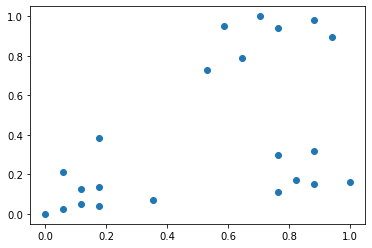

In [121]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

plt.scatter(df.Age,df['Income($)'])

**3.A. Elbow method: compute the sum of squared error for different values of k**

In [122]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

**Plot SSE for different values of K to find the optimal K**

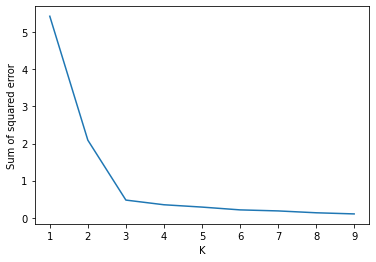

In [123]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**3.B. Use the homogeneity score on different values of K**

In [124]:
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]
homogeneityscore = []
completenessScore = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit_predict(df[['Age','Income($)']])
    homogeneityscore.append(homogeneity_score(y_true, y_predicted))


**Plot homogeneity score for different values of K to find the optimal K**

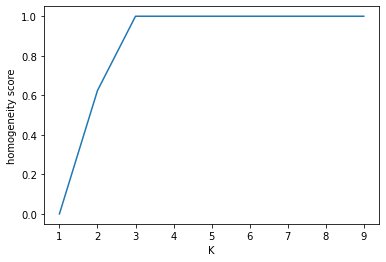

In [125]:
plt.xlabel('K')
plt.ylabel('homogeneity score')
plt.plot(k_rng, homogeneityscore)

**4. Use KMeans to create 3 clusters**

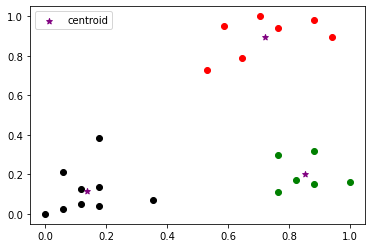

In [126]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**5. Earn Your Wings: DO it yourself**

Test this algorithm on your own data set. Note that this will require a ground truth for the clustering, as shown in step 3.B. 

Since my data doesn't have a ground truth, I am going to use the sillhouette index to evaluate if the clusters are well separated. First, I'm going to regenerate my data again:

Text(0.5, 1.0, 'Fetal fetal movement vs uterine contractions')

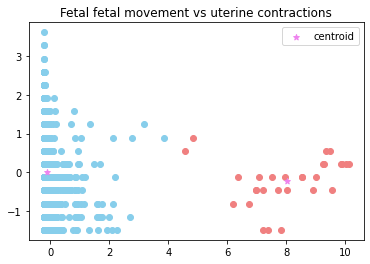

In [127]:
# get required imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Add all needed libraries to work on your data set
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

from sklearn.cluster import KMeans # find K
from sklearn.preprocessing import StandardScaler # scale data
from sklearn.metrics import silhouette_score # to get the sillhouette score

%matplotlib inline

# read in the data
f_data = pd.read_csv('UnsupervisedLearning/fetal_health.csv')

# drop the columns we don't plan to use for analysis
f_data.drop(['baseline value', 'accelerations', 'light_decelerations',
                      'severe_decelerations', 'prolongued_decelerations',
                      'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                      'percentage_of_time_with_abnormal_long_term_variability' ], 
                      axis=1)

# clean the data
# get rid of missing values
f_data.dropna()

# there aren't any categorical variables

# Define a range for possible k values. In this example, we choose 1 to 10
k_rng = range(1,10)

# Declare an array to store the values from the sum of squared error values.
sse = []

# Using a for loop, go through each value in the k range and compute the sse value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(f_data[['uterine_contractions', 'fetal_movement']])
    sse.append(km.inertia_)

# evaluates that 2 is the elbow
# Define a KMeans object with 2 as the value of k. Call the object km
km = KMeans(n_clusters=2)


# Define the StandardScaler object and save in a variable called scaler
scaler = StandardScaler()

# Scale the income feature
scaler.fit(f_data[['uterine_contractions']])
f_data['uterine_contractions'] = scaler.transform(f_data[['uterine_contractions']])

# Scale the age feature
scaler.fit(f_data[['fetal_movement']])
f_data['fetal_movement'] = scaler.transform(f_data[['fetal_movement']])

# Predict the data set excluding the name column. 
# Save the prediction in an array and call it y_predicted
y_predicted = km.fit_predict(f_data[['fetal_movement','uterine_contractions']])

# Add a column to the data frame to store the predicted cluster ID of each element
f_data['cluster'] = y_predicted

# Define the 3 data frames, f_data1, f_data2 and f_data3 each belonging to one of the three clusters
f_data1 = f_data[f_data.cluster==0]
f_data2 = f_data[f_data.cluster==1]

# Plot the data frames with different colors to differentiate them
plt.scatter(f_data1['fetal_movement'],f_data1['uterine_contractions'],color='skyblue')
plt.scatter(f_data2['fetal_movement'],f_data2['uterine_contractions'],color='lightcoral')

# Add the centroids to the plot
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='violet',marker='*',label='centroid')

# Plot the legend
plt.legend()
plt.title("Fetal fetal movement vs uterine contractions")

The silhouette coefficient is a measure of how far apart / well-separated the clusters of a kMeans result it. This is where:
* *a* is the average intra-cluster distance i.e the average distance between each point within a cluster
* *b* is the average inter-cluster distance i.e the average distance between all clusters.

![Silhouette Score formula](https://www.oreilly.com/library/view/machine-learning-for/9781786469878/assets/7a6c9f09-21c9-4d4d-807c-8a9918223f01.png)

After this point, I'm going to find the silhouette score:

In [128]:
KMean= KMeans(n_clusters=2)
KMean.fit(f_data)
label=KMean.predict(f_data)

print(
    "Silhouette Coefficient: %0.3f"
    % silhouette_score(f_data, label, metric="sqeuclidean")
)


Silhouette Coefficient: 0.561


The more well separated the clusters are, the closer the silhouette coefficient will be to 1, meaning that the clusters from Lab 2's algorithm are not very well separated.